Total no of clases detected 5
Importing classes....
0 1 2 3 4  
(5000, 32, 32, 3)
(3200, 32, 32, 3)
(1000, 32, 32, 3)
(800, 32, 32, 3)
[645, 628, 659, 631, 637]


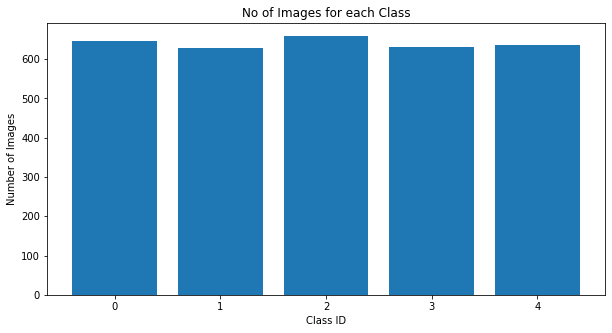

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

c:\Users\Sree\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 5s 42ms/step - loss: 1.6039 - accuracy: 0.2150 - val_loss: 1.5759 - val_accuracy: 0.2113
Epoch 2/30
20/20 [==============================] - 1s 27ms/step - loss: 1.5058 - accuracy: 0.3150 - val_loss: 1.1072 - val_accuracy: 0.5437
Epoch 3/30
20/20 [==============================] - 1s 27ms/step - loss: 1.3430 - accuracy: 0.4270 - val_loss: 1.0330 - val_accuracy: 0.5700
Epoch 4/30
20/20 [==============================] - 1s 27ms/step - loss: 1.1704 - accuracy: 0.4780 - val_loss: 0.8296 - val_accuracy: 0.6087
Epoch 5/30
20/20 [==============================] - 1s 35ms/step - loss: 1.0870 - accuracy: 0.5120 - val_loss: 0.8169 - val_accuracy: 0.6363
Epoch 6/30
20/20 [==============================] - 1s 29ms/step - loss: 1.0201 - accuracy: 0.5190 - val_loss: 0.7512 - val_accuracy: 0.6700
Epoch 7/30
20/20 [==============================] - 1s 32ms/step - loss: 0.9372 - accuracy: 0.6090 - val_loss: 0.6580 - val_accuracy: 0.6662
Epoch 8/30
20/20 [======

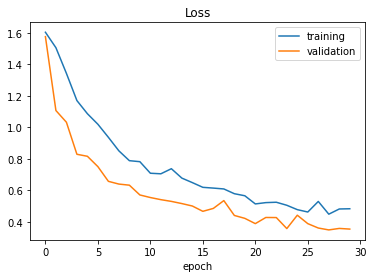

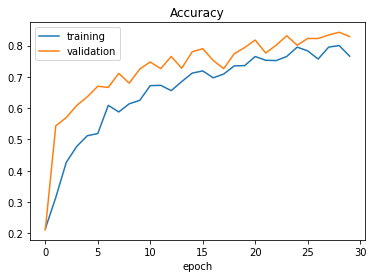

Test Score =  0.30894964933395386
Test Accuracy = 0.8600000143051147


INFO:tensorflow:Assets written to: ram://f0e0c293-54fa-46ae-ac50-c5f57c7f64ea/assets


INFO:tensorflow:Assets written to: ram://f0e0c293-54fa-46ae-ac50-c5f57c7f64ea/assets


In [1]:
-from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Activation, Flatten, Softmax
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D
import pickle

##################################
path= 'Notes'
testRatio=0.2
valRatio=0.2
imageDimensions=(32,32,3)

batchSizeVal= 50
epochsVal= 30
stepsPerEpoch = 20

####################################
images =[]
count=0
classNo =[]
List= os.listdir(path)
print("Total no of clases detected",len(List))
noOfClasses = len(List)
print("Importing classes....")
for x in range (0,noOfClasses):
    PicList = os.listdir(path+"/"+str((x)))

    for y in PicList:
         curImg = cv2.imread(path+"/"+str(x)+"/"+y)
         curImg =cv2.resize(curImg,(32,32))
         images.append(curImg)
         classNo.append(count)
    print(count,end= " ")
    count +=1
print(" ")

images = np.array(images)
classNo = np.array(classNo)
print(images.shape)
## Spliting the data
x_train, x_test,y_train,y_test = train_test_split(images,classNo,test_size=0.2)
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=valRatio)
print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)


numOfSamples= []
for x in range(0,noOfClasses):
    ##print(len(np.where(y_train==0)[0]))
    numOfSamples.append(len(np.where(y_train==x)[0]))
print(numOfSamples)

plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClasses),numOfSamples)
plt.title("No of Images for each Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

def preProcessing(img):
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.equalizeHist(img)
        img = img/255
        return img

#img = preProcessing(x_train[30])
#img=cv2.resize(img,(300,300))
#cv2.imshow("PreProcessed",img)
#cv2.waitKey(0)

x_train=np.array(list(map(preProcessing,x_train)))
x_test=np.array(list(map(preProcessing,x_test)))
x_validation=np.array(list(map(preProcessing,x_validation)))

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_validation = x_validation.reshape(x_validation.shape[0],x_validation.shape[1],x_validation.shape[2],1)

dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

dataGen.fit(x_train)

y_train=to_categorical(y_train,noOfClasses)
y_test=to_categorical(y_test,noOfClasses)
y_validation=to_categorical(y_validation,noOfClasses)

def myModel():
    noOfFilters= 60
    sizeOfFilter1=(5,5)
    sizeOfFilter2= (3,3)
    sizeOfPool= (2,2)
    noOfNode = 500

    model = Sequential()
    model.add((Conv2D(noOfFilters,sizeOfFilter1,input_shape=(imageDimensions[0],imageDimensions[1],1), activation='relu')))
    model.add((Conv2D(noOfFilters, sizeOfFilter1, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(noOfNode,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model = myModel()
print(model.summary())

history = model.fit(dataGen.flow(x_train,y_train,batch_size=batchSizeVal),steps_per_epoch=stepsPerEpoch,
                    epochs=epochsVal,validation_data=(x_validation,y_validation),
                    shuffle=1)

"""
new_img = cv2.imread()
pred = model.predict(new_img)

"""

# print(history)
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

pickle_out = open("model_trained.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()


In [2]:
import numpy as np
import cv2
import pickle

##########################################
width = 640
height = 480
threshold = 0.85
##########################################
cap = cv2.VideoCapture(0)
cap.set(3,width)
cap.set(4,height)

pickle_in = open("model_trained.pkl","rb+")
# model = pickle.loads(pickle_in)

def preProcessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img / 255
    return img

while True:
    success, imgOriginal = cap.read()
    imgOriginal = cv2.imread("C:\\Users\\Sree\\PycharmProjects\\serious\\Notes\\1\\h1.jpg")
    img = np.asarray(imgOriginal)
    img = cv2.resize(img,(32,32))
    img = preProcessing(img)
    cv2.imshow("Processed Image",img)
    img = img.reshape(1,32,32,1)

    #Predict
    # classIndex = int(model.predict_classes(img))
    #print(classIndex)
    predictions = model.predict(img)[0]
    print(predictions)
    probVal= np.amax(predictions)
    # print(classIndex,probVal)

    # if probVal> threshold:
      #     cv2.putText(imgOriginal,str(classIndex) +"  "+str(probVal),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),1)
    cv2.imshow("Original Image",imgOriginal)

    if cv2.waitKey(1) &0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

1/1 [==============================] - 0s 264ms/step
[4.5444068e-07 9.9919158e-01 8.0780487e-04 9.5245404e-08 9.4927604e-09]
1/1 [==============================] - 0s 24ms/step
[4.5444068e-07 9.9919158e-01 8.0780487e-04 9.5245404e-08 9.4927604e-09]
1/1 [==============================] - 0s 24ms/step
[4.5444068e-07 9.9919158e-01 8.0780487e-04 9.5245404e-08 9.4927604e-09]
1/1 [==============================] - 0s 24ms/step
[4.5444068e-07 9.9919158e-01 8.0780487e-04 9.5245404e-08 9.4927604e-09]
1/1 [==============================] - 0s 16ms/step
[4.5444068e-07 9.9919158e-01 8.0780487e-04 9.5245404e-08 9.4927604e-09]
1/1 [==============================] - 0s 16ms/step
[4.5444068e-07 9.9919158e-01 8.0780487e-04 9.5245404e-08 9.4927604e-09]
1/1 [==============================] - 0s 22ms/step
[4.5444068e-07 9.9919158e-01 8.0780487e-04 9.5245404e-08 9.4927604e-09]
1/1 [==============================] - 0s 27ms/step
[4.5444068e-07 9.9919158e-01 8.0780487e-04 9.5245404e-08 9.4927604e-09]
1/1 [==

In [3]:
cv2.destroyAllWindows()
cap.release()


In [5]:

def sliding_window(image, stepSize):
	imgarr=[]
	# xarr = []
	# yarr = []

	Eline[]=[[115,][212][320][426]]
	Gline[]=[[109][206][314][420]]
	#F if condition stating that it touches both.
	Cline[]=[[120][216][325][432]]
	Dline[]=[[115 &&119][212&&216][320&&324][426&&430]]
	Fline[]=[[109 && 115][206&&212][320&&314][426&&420]]
	#Aline[]=[[]]
	#Bline[]=[[]]
	##################################################
Cl2[]=[[115&&119],[216],[314],[430]]
cl1[]=[[115],[115 &&119],[109],[109 && 115],[212][320][426][206][314][420][120][216][325][432][212&&216][320&&324][426&&430][206&&212][320&&314][426&&420]]

class0[]=[]
class1[]=[]
class2[]=[]
class3[]=[]
class4[]=[]
	# slide a window across the image
	for y in range(0, image.shape[0] - stepSize - 1):
		for x in range(0, image.shape[1] - stepSize - 1):
			# yield the current window
			img=image[y:y+stepSize,x:x+stepSize]
			# Prediction of the class here
			 print(classIndex,probVal)
 		    if probVal> threshold:
      			cv2.putText(imgOriginal,str(classIndex) +"  "+str(probVal),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),1)
# Append the coords in xarr and yarr


for a in (0,410):
			if probVal in predictions[0]
			class0.append(x,y)
			if probVal in predictions[1]
			class1.append(x,y)
			if probVal in predictions[2]
			class2.append(x,y)
			if probVal in predictions[3]
			class3.append(x,y)
			if probVal in predictions[4]
			class4.append(x,y)
		# Return the xarr and yarr
			imgarr.append(img)
	return imgarr


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 30)

In [ ]:
testimage=cv2.imread("download.png")
imarr=sliding_window(testimage,stepSize=32)
count=0
for i in imarr:
    img = np.asarray(i)
    img = cv2.resize(img,(32,32))
    img = preProcessing(img)
    cv2.imshow("Processed Image",img)
    img = img.reshape(1,32,32,1)

    #Predict
    # classIndex = int(model.predict_classes(img))
    #print(classIndex)
    predictions = model.predict(img)[0]
    print(predictions)
    probVal= np.amax(predictions)#insert max function
    count+=1
    #identify index of max 

1/1 [==============================] - 0s 25ms/step
[2.0199411e-06 9.9980623e-01 1.8807911e-04 4.0743674e-07 3.3409765e-06]
1/1 [==============================] - 0s 30ms/step
[1.5932047e-06 9.9990451e-01 8.8551482e-05 3.5571313e-07 4.9867840e-06]
1/1 [==============================] - 0s 25ms/step
[1.7190613e-06 9.9994183e-01 5.0741994e-05 3.2299280e-07 5.4997367e-06]
1/1 [==============================] - 0s 35ms/step
[2.1029259e-06 9.9995124e-01 3.2076605e-05 3.5475369e-07 1.4164751e-05]
1/1 [==============================] - 0s 34ms/step
[1.9531939e-05 9.9981648e-01 7.2632400e-05 2.9640705e-06 8.8453970e-05]
1/1 [==============================] - 0s 36ms/step
[5.7961366e-05 9.9957436e-01 1.7222934e-04 8.6838427e-06 1.8686066e-04]
1/1 [==============================] - 0s 36ms/step
[2.0557982e-04 9.9909282e-01 3.9234830e-04 2.9960493e-05 2.7926662e-04]
1/1 [==============================] - 0s 22ms/step
[8.8182121e-04 9.9696666e-01 9.2358340e-04 2.0826457e-04 1.0195918e-03]
1/1 [===

KeyboardInterrupt: 

: 

In [ ]:
"""
You'll get the class names and the corresponding y coords of every symbol.
Compare those y coords of the symbol to the y coords of the horizontal lines to get which line the symbol is touching.

You have which symbol (count) and where is the symbol (which key).
"""

In [ ]:
################################################################################################
line_y_coords = [[94,99,105,109,115],[192,196,202,206,212],[299,304,309,315,320],[406,410,416,420,426]]
#while TRUE
for a in (0,410):
    if note in line_y_coords 
    if note in Cline 
        cv2.puttext("C ")
    elif note in Dline 
        cv2.puttext("D ")
    elif note in Eline 
        cv2.puttext("E ")    
    elif note in Fline 
        cv2.puttext("F ")
   
    print(max)